# Project: Capstone Project 1: Data Wrangling

Now that you have a basic ideas of the various data wrangling steps and techniques available, let's apply it to your capstone project.

The first step in completing your capstone project is to collect data. 
Depending on your dataset, you may apply some of the data wrangling techniques that you learned in this unit. Some of you may be using standard datasets and sources, such as Kaggle or Yelp, where minimal or no data wrangling is required. Students often find that this part of the project takes a lot longer than they estimated, which is completely normal. The more work you put in, the more you’ll learn. Data wrangling is an important tool in a data scientist’s toolbox!  

Steps:
Create a Google Doc (1-2 pages) describing the data wrangling steps you took to clean the dataset. Include answers to these questions in your submission:

What kind of cleaning steps did you perform?

How did you deal with missing values, if any?

Were there outliers, and how did you handle them?

Submit a link to the document.

Discuss it with your mentor at the next call.

Revise and resubmit if needed.

Convert the final document to a .pdf and add it to your GitHub repository for this project. 
This document will eventually become part of your milestone report.

---
Steps I will be taking:
1. Collect data from Quandl. Qaundl is currently the most widely used aggregator of financial market data. 
API Excercie Notes: You will need to register for a free account on the http://www.quandl.com website.After you register, you will be provided with a unique API key.
2. 

In [3]:
# Setup - set variables and import libraries

# Import all necessary libraries
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf  
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
from scipy import stats
import pprint
#import statistics as st
#import matplotlib
#import quandl
#API_KEY = 'caSsMS95EZAzdK77dMsj' # Store API key as string - according to PEP8, constants always upper case

# set variables
start_dt = '2014-05-01'
end_dt = '2018-12-31'
stock1 = 'ESV'
stock2 = 'SRAX'

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


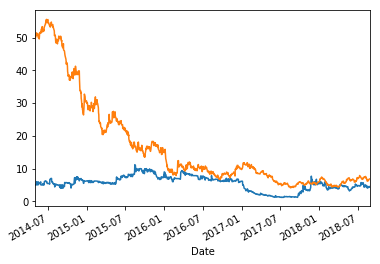

In [4]:
# Download Option1: Yahoo Finance
# Need to install fix_yahoo_finance using command <pip install fix_yahoo_finance> on terminal
y_esv = yf.download(stock1,start_dt, end_dt)
y_srax = yf.download(stock2,start_dt, end_dt)
y_srax.Close.plot()
y_esv.Close.plot()
plt.show()

In [5]:
y_esv.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,50.270000,50.369999,49.750000,49.820000,45.184910,2726900
2014-05-02,49.930000,50.330002,49.820000,49.930000,45.284676,2226700
2014-05-05,49.869999,50.799999,49.750000,50.750000,46.028385,3078600
2014-05-06,50.770000,51.250000,50.360001,51.150002,46.391174,2093000
2014-05-07,51.259998,51.529999,50.689999,51.500000,46.708607,1794100


In [451]:
#UPDATE: NOT USING QUANDL BECAUSE COULDN'T FIND SRAX DATA
# Download Option2: Quandl 
#q_esv = quandl.get("WIKI/"+stock1, start_date=start_dt, end_date=end_dt, api_key=API_KEY)
#q_esv.Close.plot()
#plt.show()

In [452]:
# Get max open, high, low and close for the selecte period
mao=round(max(y_esv.Open),2)
mah=round(y_esv.High.max(),2) # alternate method to get max
mal=round(max(y_esv.Low),2)
mac=round(max(y_esv.Close),2)

In [453]:
# Get min open, high, low and close for the selecte period
mio=round(y_esv.Open.min(),2)
mih=round(min(y_esv.High),2)
mil=round(min(y_esv.Low),2)
mic=round(min(y_esv.Close),2)

In [454]:
print('Maxs - ','Open:',mao,' High:',mah, ' Low:',mal, ' Close:',mac)
print('Mins - ','Open:',mio,' High:',mih, ' Low:',mil, ' Close:',mic)

Maxs -  Open: 55.55  High: 55.89  Low: 55.1  Close: 55.62
Mins -  Open: 4.15  High: 4.28  Low: 4.1  Close: 4.16


In [455]:
# Check the result with built in function as cross-validation - passed
esv_med = y_esv.Open.median()
esv_mean = y_esv.Open.mean()
srax_med = y_srax.Open.median()
srax_mean = y_srax.Open.mean()
print("ESV Median:",esv_med, " ESV Mean:",esv_mean, " | ","SRAX Median:",srax_med, " SRAX Mean:",srax_mean)

ESV Median: 10.09  ESV Mean: 16.63975207529844  |  SRAX Median: 5.75  SRAX Mean: 5.466083562901751


In [456]:
y_esv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1089 entries, 2014-05-01 to 2018-08-24
Data columns (total 6 columns):
Open         1089 non-null float64
High         1089 non-null float64
Low          1089 non-null float64
Close        1089 non-null float64
Adj Close    1089 non-null float64
Volume       1089 non-null int64
dtypes: float64(5), int64(1)
memory usage: 59.6 KB


In [457]:
y_srax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1089 entries, 2014-05-01 to 2018-08-24
Data columns (total 6 columns):
Open         1089 non-null float64
High         1089 non-null float64
Low          1089 non-null float64
Close        1089 non-null float64
Adj Close    1089 non-null float64
Volume       1089 non-null int64
dtypes: float64(5), int64(1)
memory usage: 59.6 KB


In [458]:
# Get correlation between ESV and SRAX
meas = 'Close'
print(pearsonr(y_esv[meas], y_srax[meas]))

(0.21666765285945955, 4.9071149376115774e-13)


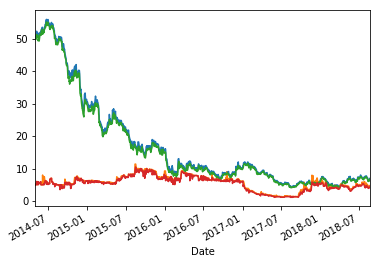

In [459]:
y_esv.High.plot()
y_srax.High.plot()
y_esv.Low.plot()
y_srax.Low.plot()
plt.show()

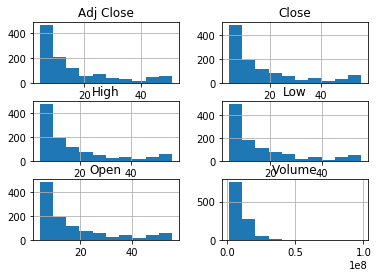

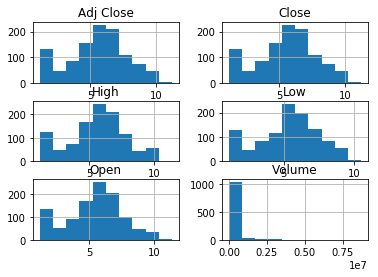

In [460]:
y_esv.hist()
y_srax.hist()
plt.show()

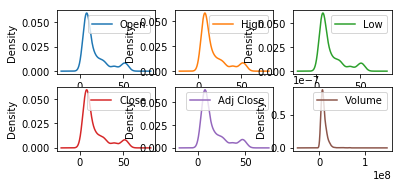

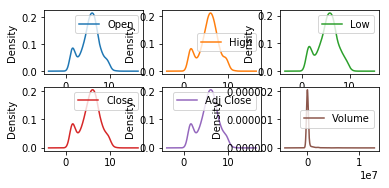

In [461]:
y_esv.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
y_srax.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

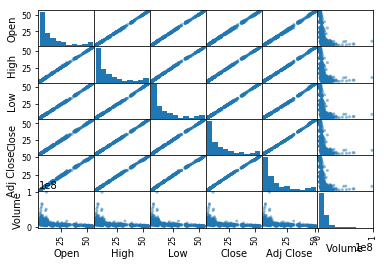

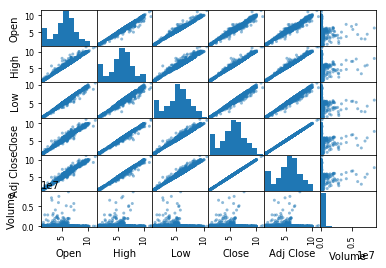

In [462]:
pd.plotting.scatter_matrix(y_esv)
pd.plotting.scatter_matrix(y_srax)
plt.show()

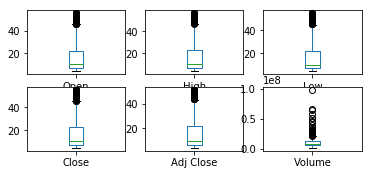

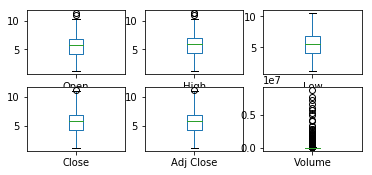

In [463]:
y_esv.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
y_srax.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [466]:
# Quest to remove outliers
stats.zscore(y_esv, axis=0, ddof=0)

array([[  2.38484136e+00,   2.35380873e+00,   2.39827405e+00,
          2.35826018e+00,   2.27667630e+00,  -9.79621040e-01],
       [  2.36073075e+00,   2.35099114e+00,   2.40329148e+00,
          2.36607224e+00,   2.28442711e+00,  -1.04996312e+00],
       [  2.35647586e+00,   2.38410013e+00,   2.39827405e+00,
          2.42430765e+00,   2.34220573e+00,  -9.30162209e-01],
       ..., 
       [ -7.14791332e-01,  -7.19007251e-01,  -7.01784875e-01,
         -7.06910882e-01,  -7.16317037e-01,  -2.08839531e-03],
       [ -7.11954788e-01,  -7.19007251e-01,  -6.96767438e-01,
         -7.03359942e-01,  -7.12432546e-01,  -3.31354556e-01],
       [ -6.94226393e-01,  -7.02804874e-01,  -6.83865459e-01,
         -6.97678439e-01,  -7.06217361e-01,  -4.56161815e-01]])

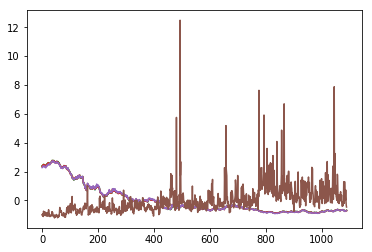

In [467]:
plt.plot(stats.zscore(y_esv, axis=0, ddof=0))
plt.show()

In [513]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

def reject_outliers_2(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/(mdev if mdev else 1.)
    return data[s<m]

data_points = np.array([10, 10, 10, 17, 10, 10])
print(reject_outliers(data_points))
print(reject_outliers_2(data_points))
#[[10, 10, 10, 17, 10, 10]]  # 17 is not filtered
#[10, 10, 10, 10, 10]  # 17 is filtered (it's distance, 7, is greater than m)

[[10 10 10 17 10 10]]
[10 10 10 10 10]


In [514]:
# IT CREATED HOLES IN PLOTS, NOT SURE IF IT'S USEFUL, BUT KEEPING IT FOR NOW
#setting the number to NaN rather than removing it from the data, 
#since if you remove it you change the length which can mess up plotting 
#(i.e. if you're only removing outliers from one column in a table, 
#but you need it to remain the same as the other columns so you can plot them against each other).
#https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list (Alex S. Jun 20)
#https://stackoverflow.com/users/728286/alex-s
''' THIS IS A COMMENT
def reject_outliers(data, m=2):
    stdev = np.std(data)
    mean = np.mean(data)
    maskMin = mean - stdev * m
    maskMax = mean + stdev * m
    mask = np.ma.masked_outside(data, maskMin, maskMax)
    print('Masking values outside of {} and {}'.format(maskMin, maskMax))
    return mask
print(reject_outliers(data_points))
'''

" THIS IS A COMMENT\ndef reject_outliers(data, m=2):\n    stdev = np.std(data)\n    mean = np.mean(data)\n    maskMin = mean - stdev * m\n    maskMax = mean + stdev * m\n    mask = np.ma.masked_outside(data, maskMin, maskMax)\n    print('Masking values outside of {} and {}'.format(maskMin, maskMax))\n    return mask\nprint(reject_outliers(data_points))\n"

In [515]:
esv_no=reject_outliers_2(y_esv)
srax_no=reject_outliers_2(y_srax)

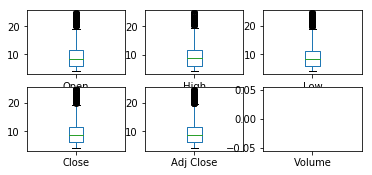

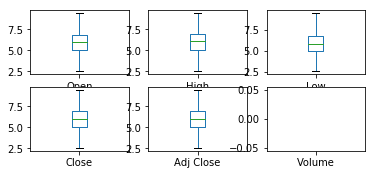

In [516]:
#let's look at boxplot again to see if outliers are removed
esv_no.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
srax_no.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

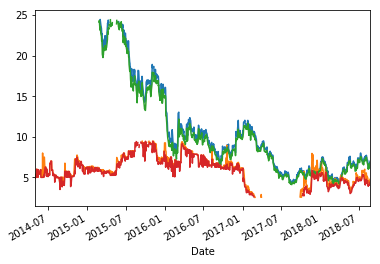

In [517]:
esv_no.High.plot()
srax_no.High.plot()
esv_no.Low.plot()
srax_no.Low.plot()
plt.show()